# E-Commerce Fraud Detection Model - EDA
## Graham Miller
## GitHub Link: https://github.com/gmill88/Capstone-Miller 
## Project Description: 
Detecting and stopping E-Commerce fraud is crucial as E-Commerce con-
tinues to grow. Machine learning can be used to analyze data, identify pat-
terns, and adapt to trends to improve fraud detection [2]. This study aims to
develop a model that correctly identifies card-not-present fraud in the Kaggle
dataset,https://www.kaggle.com/datasets/vbinh002/fraud-ecommerce/data, of
simulated E-Commerce transactions, as real transactions cannot be used due to
privacy issues.

### Import Dataset

In [2]:
import pandas as pd

# Load your data
df = pd.read_csv('Fraud_Data.csv')
print(df.head())

   user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  


### Remove Signup Time and Purchase Time and Create Cleaned Data CSV

In [3]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('Fraud_Data.csv')

# Convert the signup_time and purchase_time columns to datetime
df['signup_time'] = pd.to_datetime(df['signup_time'])
df['purchase_time'] = pd.to_datetime(df['purchase_time'])

# Calculate the time difference in minutes
df['time_difference'] = (df['purchase_time'] - df['signup_time']).dt.total_seconds() / 60

# Drop the signup_time and purchase_time columns
df = df.drop(columns=['signup_time', 'purchase_time'])

# Save the modified DataFrame to a new CSV
df.to_csv('cleaned_data.csv', index=False)

### Import Cleaned Data Set and Inspect

In [4]:
import pandas as pd

# Load your data
df = pd.read_csv('cleaned_data.csv')
df.head()

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,class,time_difference
0,22058,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,75111.366667
1,333320,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,299.066667
2,1359,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,0.016667
3,150084,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,8201.416667
4,221365,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,72691.016667


### Check the number of rows and columns in the data set

In [5]:
df.shape

(151112, 10)

### Inspect Name and Data Type of Each Column

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   user_id          151112 non-null  int64  
 1   purchase_value   151112 non-null  int64  
 2   device_id        151112 non-null  object 
 3   source           151112 non-null  object 
 4   browser          151112 non-null  object 
 5   sex              151112 non-null  object 
 6   age              151112 non-null  int64  
 7   ip_address       151112 non-null  float64
 8   class            151112 non-null  int64  
 9   time_difference  151112 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 11.5+ MB


### Data Description for both numerical and categorical columns

In [7]:
df.describe(include='all')

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,class,time_difference
count,151112.000000,151112.000000,151112,151112,151112,151112,151112.000000,1.511120e+05,151112.000000,151112.000000
unique,NaN,NaN,137956,3,5,2,NaN,NaN,NaN,NaN
top,NaN,NaN,ITUMJCKWEYNDD,SEO,Chrome,M,NaN,NaN,NaN,NaN
freq,NaN,NaN,20,60615,61432,88293,NaN,NaN,NaN,NaN
mean,200171.040970,36.935372,NaN,NaN,NaN,NaN,33.140704,2.152145e+09,0.093646,82200.487477
std,115369.285024,18.322762,NaN,NaN,NaN,NaN,8.617733,1.248497e+09,0.291336,52104.385307
min,2.000000,9.000000,NaN,NaN,NaN,NaN,18.000000,5.209350e+04,0.000000,0.016667
25%,100642.500000,22.000000,NaN,NaN,NaN,NaN,27.000000,1.085934e+09,0.000000,36445.891667
50%,199958.000000,35.000000,NaN,NaN,NaN,NaN,33.000000,2.154770e+09,0.000000,82105.758333
75%,300054.000000,49.000000,NaN,NaN,NaN,NaN,39.000000,3.243258e+09,0.000000,127408.741667


### Class Distribution 

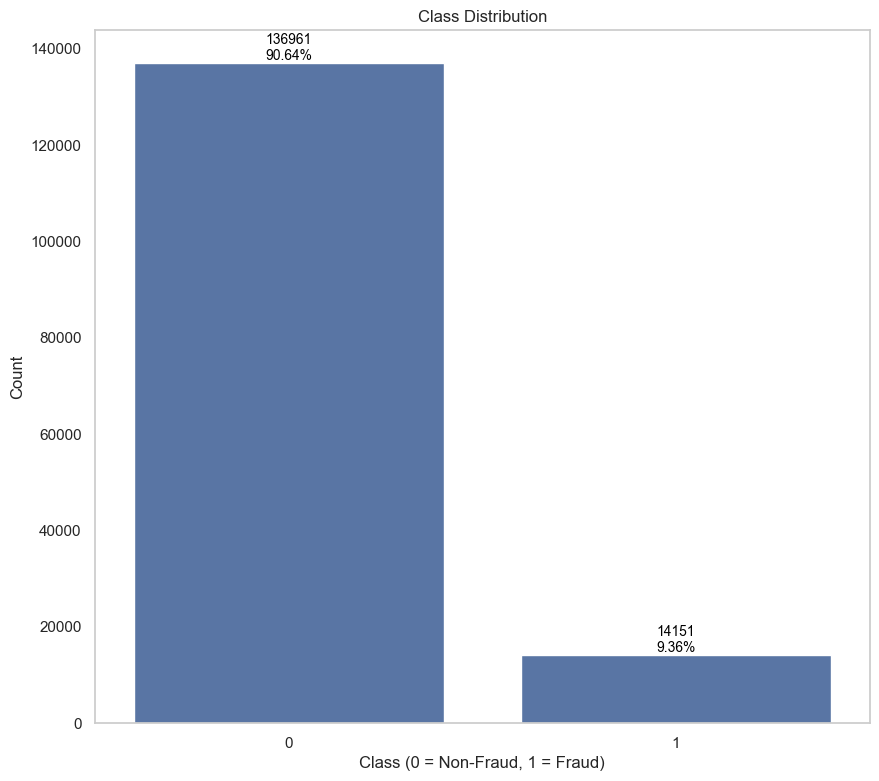

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 9))
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')

plt.grid(False)
# Calculate total count for percentages
total = len(df)

# Add data label with percentage and count
for p in plt.gca().patches:
    count = p.get_height()
    percentage = f'{(count / total) * 100:.2f}%'
    plt.gca().annotate(f'{int(count)}\n{percentage}',  # Use int(count) to remove decimals
                       (p.get_x() + p.get_width() / 2, count), 
                       ha='center', va='bottom', fontsize=10, color='black')

plt.show()

Since there is an obvious class imbalance of fraudulent vs. non-fraudulent
transactions, it is important to use metrics other than just accuracy to evaluate
a model. Metrics like precision, recall, and F1 score will do a better job of
indicating the performance of a model on the minority class. Understanding
that there is a class imbalance for fraudulent and non-fraudulent transaction
can also help pick a model that better handles a class imbalance

### Purchase Value by Class Box Plot Showing no Significant difference in purchase value for either class

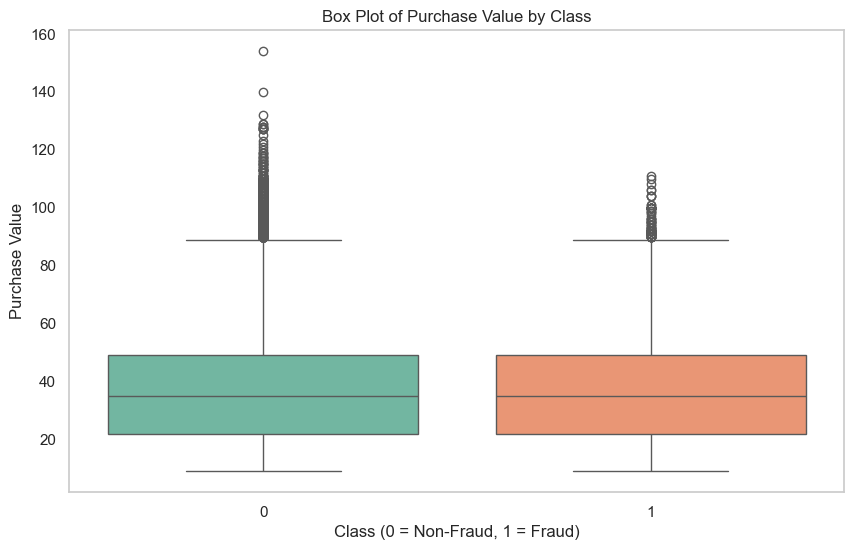

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="class", y="purchase_value", hue="class", palette="Set2", dodge=False)
plt.grid(False)

# Labels and title
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Purchase Value")
plt.title("Box Plot of Purchase Value by Class")
plt.legend([],[], frameon=False)  # Remove legend

# Show plot
plt.show()

The Class vs. Purchase Value figure shows that there is no significant dif-
ference in purchase value between fraudulent and non-fraudulent transactions.
Purchase Value will not be a good predictor of fraudulent purchases, so other
features should be explored.

### Fraud Percentage By Source Box Graph

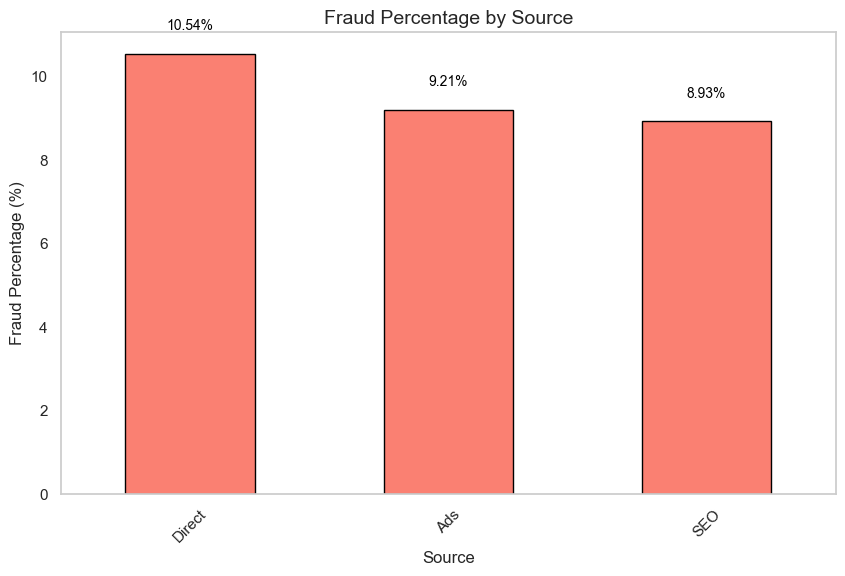

In [51]:
import matplotlib.pyplot as plt

# Calculate fraud percentage by source and sort in descending order
fraud_by_source = df.groupby('source')['class'].apply(lambda x: (x == 1).mean() * 100).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
fraud_by_source.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Fraud Percentage by Source', fontsize=14)
plt.xlabel('Source', fontsize=12)
plt.ylabel('Fraud Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(False)

for i, value in enumerate(fraud_by_source):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

# Show plot
plt.show()

The Source vs. Fraud Percentage bar graph displays the percentage of trans-
actions generated from each source that were fraudulent. Direct transactions
had a higher fraud percent than transactions generated from ads or SEO (search
engine optimization). While direct had a higher percentage of fraudulent trans-
actions, it was only around 1.5% higher than the other sources so its importance
in modeling will need to be further explored.

### Fraud Percentage by Browser Bar Graph

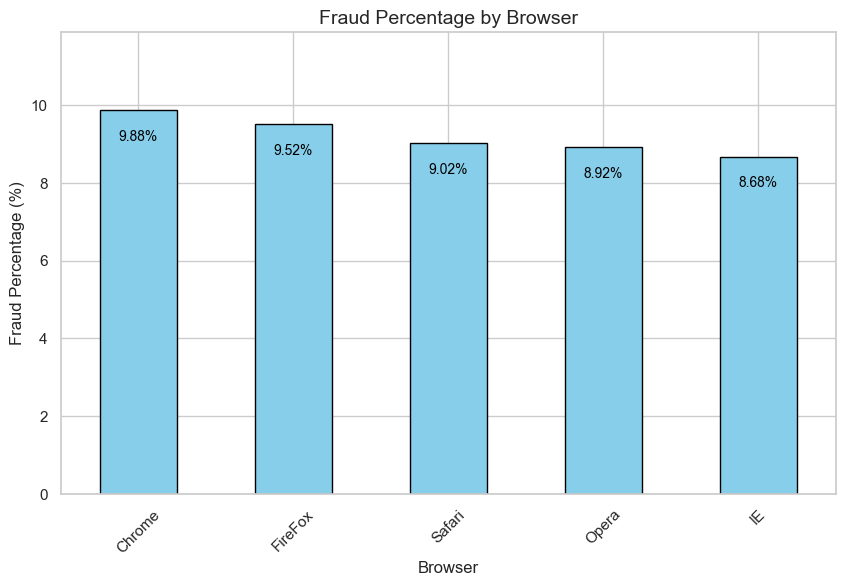

In [66]:
import matplotlib.pyplot as plt

# Calculate fraud percentage by browser and sort in descending order
fraud_by_browser = df.groupby('browser')['class'].apply(lambda x: (x == 1).mean() * 100).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
ax = fraud_by_browser.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Fraud Percentage by Browser', fontsize=14)
plt.xlabel('Browser', fontsize=12)
plt.ylabel('Fraud Percentage (%)', fontsize=12)
plt.xticks(rotation=45)

# Increase y-axis limit to add padding at the top
plt.ylim(0, fraud_by_browser.max() + 2)

# Add data labels inside the bars
for i, value in enumerate(fraud_by_browser):
    plt.text(i, value - 0.5, f'{value:.2f}%', ha='center', va='top', fontsize=10, color='black')

# Show plot
plt.show()

The Browser vs. Fraud Percentage bar graph shows the percentage of trans-
actions by browser that were fraudulent. Chrome and Firefox had higher a higher
percentage of fraudulent transactions than the other browsers, but the difference
in percentage between each browser is small. That being said, it is unlikely that
the browser used will be a good indicator of fraudulent transactions.

### Fraud Percentage by Sex Bar Graph

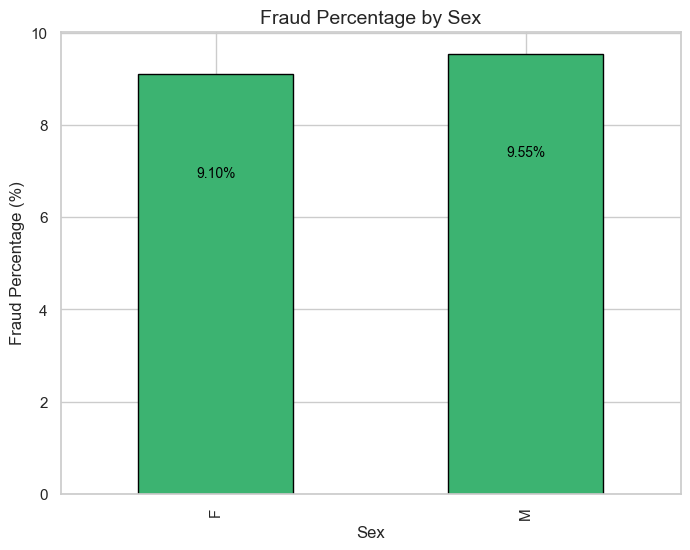

In [70]:
import matplotlib.pyplot as plt

# Calculate fraud percentage by sex
fraud_by_sex = df.groupby('sex')['class'].apply(lambda x: (x == 1).mean() * 100)

# Plot
plt.figure(figsize=(8, 6))
ax = fraud_by_sex.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title('Fraud Percentage by Sex', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Fraud Percentage (%)', fontsize=12)

# Add data labels inside the bars
for i, value in enumerate(fraud_by_sex):
    plt.text(i, value - 2, f'{value:.2f}%', ha='center', va='top', fontsize=10, color='black')

# Show plot
plt.show()

The Sex vs. Fraud bar graph is used to determine if one sex was more likely
to complete a fraudulent transaction than the other. The graph shows the per-
centage of the transactions that were fraudulent for both sexes represented in
the data. Fraudulent transactions by males were 0.45% higher than females.
While there is a difference in percentage of fraudulent transactions between the
sexes, the difference is not enough to make sex a good indicator of fraudulent
transactions.

### Violin Plot of the Time Difference for Each Class

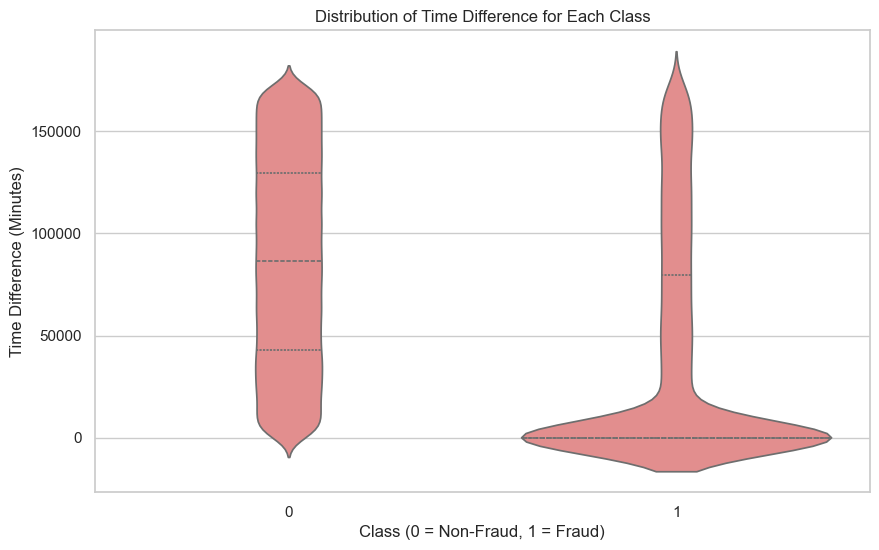

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate quartiles for each class
quartiles = df.groupby('class')['time_difference'].quantile([0.25, 0.5, 0.75]).unstack()

plt.figure(figsize=(10, 6))
sns.violinplot(x='class', y='time_difference', data=df, inner="quartile", color="lightcoral")
plt.title('Distribution of Time Difference for Each Class')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Time Difference (Minutes)')

plt.show()

The violin plot of the time difference distributions for non-fraudulent and
fraudulent transactions is used to identify patterns in how quickly an initial pur-
chase is made after sign-up. Based on the plot, non-fraudulent transactions have
a uniform spread, so there are no discernible patterns in time difference for non-
fraudulent transactions. Fraudulent transactions however are more concentrated
around zero, meaning fraudulent transactions have significantly lower time dif-
ference values than non-fraudulent transactions. The difference in distribution
of time differences between fraudulent and non-fraudulent transactions looks to
be significant, and could be a good indicator for fraudulent transactions.

### Fraudulent and Non-Fraudulent Transactions by User Type (Single or Multiple)

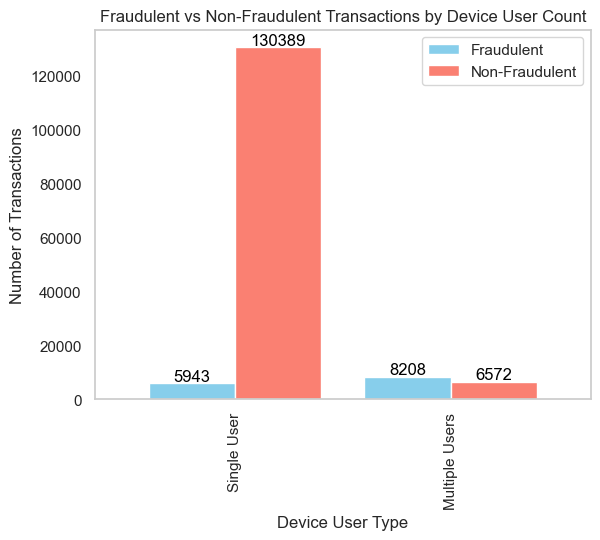

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your dataframe
# Filter fraudulent and non-fraudulent transactions and create explicit copies
fraud_df = df[df['class'] == 1].copy()
non_fraud_df = df[df['class'] == 0].copy()

# Group by 'device_id' and count unique 'user_id's for both fraudulent and non-fraudulent transactions
fraud_device_user_count = fraud_df.groupby('device_id')['user_id'].nunique()
non_fraud_device_user_count = non_fraud_df.groupby('device_id')['user_id'].nunique()

# Create new columns to classify devices as single or multiple users for both fraudulent and non-fraudulent transactions
fraud_df['user_type'] = fraud_df['device_id'].apply(lambda x: 'Single User' if fraud_device_user_count[x] == 1 else 'Multiple Users')
non_fraud_df['user_type'] = non_fraud_df['device_id'].apply(lambda x: 'Single User' if non_fraud_device_user_count[x] == 1 else 'Multiple Users')

# Count fraudulent and non-fraudulent transactions in each category
fraud_counts = fraud_df['user_type'].value_counts()
non_fraud_counts = non_fraud_df['user_type'].value_counts()

# Reorder the counts to show 'Single User' first for both
fraud_counts = fraud_counts[['Single User', 'Multiple Users']]
non_fraud_counts = non_fraud_counts[['Single User', 'Multiple Users']]

# Combine the counts for plotting
combined_counts = pd.DataFrame({
    'Fraudulent': fraud_counts,
    'Non-Fraudulent': non_fraud_counts
}).fillna(0)

# Plot the data
ax = combined_counts.plot(kind='bar', color=['skyblue', 'salmon'], width=0.8)
plt.title('Fraudulent vs Non-Fraudulent Transactions by Device User Count')
plt.xlabel('Device User Type')
plt.ylabel('Number of Transactions')
plt.grid(False)

# Add counts above the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()

The grouped bar displaying devices as single or multiple user for fraudulent
and non-fraudulent transactions can be used to identify patterns in fraudulent
transactions for devices with a single user or multiple users. For fraudulent trans-
actions, devices with multiple users accounted for nearly 60% of the fraudulent
transactions. For non-fraudulent transactions, less than 5% of transactions oc-
curred on a device with multiple users. This shows that the majority of non-
fraudulent transactions occur on a device with a single user, while a large per-
centage of fraudulent transactions occurred on a device that used multiple user
ids. Therefore, a device id with multiple user id’s could be a good indicator
of fraudulent transactions.

### Numerical Features Heatmap

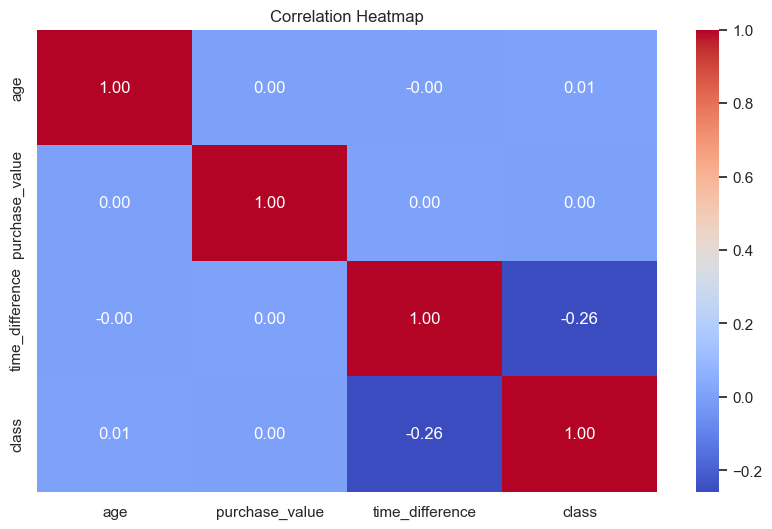

In [19]:
# Correlation heatmap
correlation_matrix = df[['age', 'purchase_value', 'time_difference', 'class']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

The heat map shows the correlation between numerical features in the data.
All features are almost completely uncorrelated with the exception of time difference
and class which are weakly correlated. For the sake of creating a model, weak
to no correlation is preferred. Strongly correlated features can reduce a models
accuracy, and can lead to redundancy within the model causing overfitting.